In [2]:
import os
import sys
os.chdir("/Users/DanPfeiffer/Documents/code/data-collector/src")
sys.path.append(os.getcwd())
import sportsdataverse as sdv
import importlib
import pandas as pd
from data_collectors.team_rankings import team_rankings_scraper
from inference import bet_recommender
from viz import viz_engine
from datetime import datetime

importlib.reload(team_rankings_scraper)
importlib.reload(bet_recommender)
importlib.reload(viz_engine)
importlib.reload(sdv)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### put latest stats in dB every Tuesday

In [3]:
stat_scraper = team_rankings_scraper.TeamRankingsScraper()
date = datetime.now()
stat_scraper.append_date_to_database(date=date)


/Users/DanPfeiffer/Documents/code/data-collector/src
reading stats db
existing stats db shape: (1024, 1589)
getting https://www.teamrankings.com/nfl/ranking/predictive-by-other?date=2024-09-30
postprocessing
getting https://www.teamrankings.com/nfl/ranking/home-by-other?date=2024-09-30
postprocessing
(32, 35)
getting https://www.teamrankings.com/nfl/ranking/away-by-other?date=2024-09-30
postprocessing
(32, 52)
getting https://www.teamrankings.com/nfl/ranking/home-adv-by-other?date=2024-09-30
postprocessing
(32, 69)
getting https://www.teamrankings.com/nfl/ranking/schedule-strength-by-other?date=2024-09-30
postprocessing
(32, 74)
getting https://www.teamrankings.com/nfl/ranking/sos-basic-by-other?date=2024-09-30
postprocessing
(32, 79)
getting https://www.teamrankings.com/nfl/ranking/future-sos-by-other?date=2024-09-30
postprocessing
(32, 84)
getting https://www.teamrankings.com/nfl/ranking/season-sos-by-other?date=2024-09-30
postprocessing
(32, 89)
getting https://www.teamrankings.com

In [4]:
year = 2024
week = 5
print(f"{year}: week {week}")

2024: week 5


In [5]:
br = bet_recommender.BetRecommender()

loading model from models/model_pipeline_20240911_204318.pkl
loading stats from ../data/raw/tr_stats_short.xlsx
preprocessing stats df


In [6]:
br.spread_model.mc.tda.stats_db.head(40)

,date,team,rankings_predictive_rating,rankings_home_rating,rankings_road_rating,rankings_home_advantage_rating,rankings_sos_rating,rankings_sos_basic_rating,rankings_luck_rating,rankings_consistency_rating,offense_scoring_points_per_game,offense_scoring_points_per_game_delta,offense_scoring_yards_per_point,offense_scoring_yards_per_point_delta,offense_scoring_points_per_play,offense_scoring_points_per_play_margin,offense_scoring_td_per_game,offense_scoring_rz_attempts,offense_scoring_rz_tds,offense_scoring_rz_td_pcnt,offense_scoring_ep_att,offense_scoring_ep_made,offense_scoring_2pt_att,offense_scoring_2pt_made,offense_scoring_points_per_fg,offense_scoring_ep_pcnt,offense_scoring_2pt_pcnt,offense_scoring_off_td,offense_scoring_def_td,offense_scoring_spec_td,offense_scoring_off_ppg,offense_scoring_def_ppg,offense_scoring_spec_ppg,offense_scoring_point_share_pcnt,offense_total_yards,offense_total_plays,offense_total_yards_per_play,offense_total_1st_downs,offense_total_3rd_downs,offense_total_3rd_down_conversions,offense_total_4th_downs,offense_total_4th_down_conversions,offense_total_time_of_possession,offense_total_seconds_per_play,offense_total_1st_downs_per_play,offense_total_3rd_down_conversion_pcnt,offense_total_4th_down_conversion_pcnt,offense_total_punts_per_play,offense_total_punts_per_score,offense_total_opp_tackles,offense_total_opp_solo_tackles,offense_total_opp_asst_tackles,offense_rushing_attempts,offense_rushing_yds,offense_rushing_1st_downs,offense_rushing_tds,offense_rushing_ypa,offense_rushing_play_pcnt,offense_rushing_td_pcnt,offense_rushing_1st_down_pcnt,offense_rushing_yards_pcnt,offense_passing_attempts,offense_passing_completions,offense_passing_incompletions,offense_passing_completion_pcnt,offense_passing_yards,offense_passing_yards_gross,offense_passing_ypa,offense_passing_ypc,offense_passing_td,offense_passing_td_pcnt,offense_passing_sacks,offense_passing_sack_pcnt,offense_passing_1st_downs,offense_passing_1st_down_pcnt,offense_passing_pass_rtg,offense_passing_play_pcnt,offense_passing_yds_pcnt,offense_special_teams_non_off_td,offense_special_teams_fg_att,offense_special_teams_fg_made,offense_special_teams_fg_blocked,offense_special_teams_kicking_ppg,offense_special_teams_punts,offense_special_teams_punts_blocked,offense_special_teams_gross_punt_yards,offense_special_teams_net_punt_yards,offense_special_teams_kickoffs,offense_special_teams_touchbacks,offense_special_teams_kickoff_touchback_pcnt,offense_special_teams_fg_made_pcnt_all,offense_special_teams_fg_block_pcnt,offense_special_teams_fg_made_pcnt,offense_special_teams_punt_block_pcnt,offense_special_teams_net_punt_ypa_all,offense_special_teams_gross_punt_ypa,offense_special_teams_net_punt_ypa,defense_scoring_ppg,defense_scoring_yards_per_point,defense_scoring_points_per_play,defense_scoring_tds,defense_scoring_rz_attempts,defense_scoring_rz_tds,defense_scoring_rz_td_pcnt,defense_scoring_ep_att,defense_scoring_ep_made,defense_scoring_2pt_att,defense_scoring_2pt_made,defense_scoring_points_per_fga,defense_scoring_ep_pcnt,defense_scoring_2pt_pcnt,defense_scoring_off_td,defense_scoring_def_td,defense_scoring_spec_td,defense_scoring_off_ppg,defense_scoring_def_ppg,defense_scoring_spec_ppg,defense_scoring_point_share_pcnt,defense_total_yards,defense_total_plays,defense_total_yards_per_play,defense_total_1st_downs,defense_total_3rd_downs,defense_total_3rd_down_conversions,defense_total_4th_downs,defense_total_4th_down_conversions,defense_total_time_of_possession,defense_total_seconds_per_play,defense_total_1st_downs_per_play,defense_total_3rd_down_conversion_pcnt,defense_total_4th_down_conversion_pcnt,defense_total_punts_per_play,defense_total_punts_per_score,defense_total_tackles,defense_total_solo_tackles,defense_total_assisted_tackles,defense_rushing_attempts,defense_rushing_ypg,defense_rushing_1st_downs,defense_rushing_tds,defense_rushing_ypa,defense_rushing_play_pcnt,defense_rushing_td_pcnt,defense_rushing_1st_down_pcnt,defense_rushing_yards_percent,

In [7]:
ev_table = br.get_ev_table(
    year=year,
    week=week,
    refresh_predictions=False,
    refresh_odds=False
)

Getting games_df
(14, 70)
preprocessing games data
(14, 70)
(14, 73)
adding game features
adding location info
adding location info
adding location info
adding local time
adding travel distance
adding home travel
adding away travel
adding days rest
(14, 94)
getting stats df
creating matchups for 2024
(14, 629)
merging games w/ stats
(14, 722)
Getting predictions
postprocessing request
Saving predictions to cache: ../output/predictions/2024_5_predictions.csv
Requests Used This Query: None
Requests Used this Month: 47
Requests Remaining: 453
Requests Used This Query: None
Requests Used this Month: 49
Requests Remaining: 451


In [10]:
br.best_bet_cols = [
            "game",
            "game_id",
            "game_time",
            "away",
            "away_spread_modeled",
            "away_spread",
            "home",
            "market",
            "outcome",
            "point",
            "break_even_odds",
            "price",
            "cover_pcnt",
            "expected_value",
            "ideal_bet_pcnt",
            "ideal_bet_pcnt_diluted",
            "ideal_bet_amount",
            "ideal_bet_amount_diluted",
            "book",
        ]

In [12]:
bb = br.get_best_bets()

In [15]:
bb.sort_values(by=["market", "expected_value"], ascending=False, inplace=True)
bb[[
    "game",
    "away_spread_modeled",
    "away_spread",
    "outcome",
    "point",
    "price",
    "expected_value",
    "book",
    "ideal_bet_pcnt",
    "ideal_bet_pcnt_diluted",
    "ideal_bet_amount",
    "ideal_bet_amount_diluted",
    "break_even_odds",
    "cover_pcnt",    
]]

,game,away_spread_modeled,away_spread,outcome,point,price,expected_value,book,ideal_bet_pcnt,ideal_bet_pcnt_diluted,ideal_bet_amount,ideal_bet_amount_diluted,break_even_odds,cover_pcnt
1,Jets 2.5 @ Vikings,8.771651,2.5,Vikings,-2.5,-113,0.345501,betrivers,0.390416,0.117125,1952.081315,585.624394,-249.0,0.713810
9,Cardinals 7.5 @ 49ers,13.806295,7.5,49ers,-7.5,-105,0.251502,draftkings,0.264077,0.079223,1320.385235,396.115571,-179.0,0.641013
12,Cowboys 2.5 @ Steelers,-2.500116,2.5,Cowboys,2.5,-110,0.217154,draftkings,0.238870,0.071661,1194.348754,358.304626,-176.0,0.637557
6,Panthers 3.5 @ Bears,8.059526,3.5,Bears,-3.5,-110,0.174994,espnbet,0.192493,0.057748,962.466704,288.740011,-160.0,0.615473
13,Saints 5.5 @ Chiefs,2.172521,5.5,Saints,5.5,-109,0.169070,betrivers,0.184286,0.055286,921.431404,276.429421,-156.0,0.609706
8,Raiders 2.5 @ Broncos,5.114437,2.5,Broncos,-2.5,-110,0.152965,betrivers,0.168261,0.050478,841.307040,252.392112,-152.0,0.603934
2,Bills -1.0 @ Texans,-2.222276,-1.0,Bills,-1.0,-105,0.123003,betrivers,0.129154,0.038746,645.767675,193.730303,-135.0,0.575197
5,Ravens -2.5 @ Bengals,-4.387981,-2.5,Ravens,-2.5,-112,0.098068,draftkings,0.109836,0.032951,549.181138,164.754341,-138.0,0.580111
4,Dolphins -1.0 @ Patriots,-2.122254,-1.0,Dolphins,-1.0,-109,0.075473,betrivers,0.082265,0.024680,411.325845,123.397754,-128.0,0.560892
11,Packers -3.5 @ Rams,-6.030344,-3.5,Packers,-3.5,-108,0.074788,draftkings,0.080771,0.024231,403.855009,121.156503,-126.0,0.558063


In [133]:
importlib.reload(viz_engine)
ve = viz_engine.VizEngine()

In [134]:
spreads = bb[bb["market"] == "spreads"]
h2h = bb[bb["market"] == "h2h"]

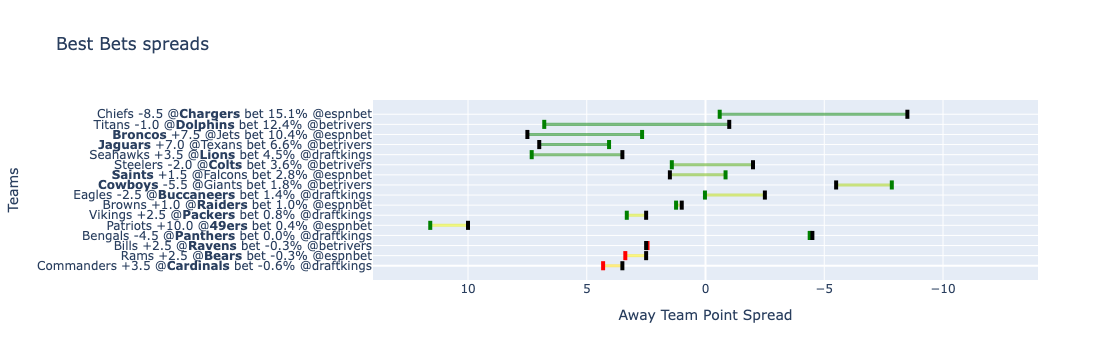

In [135]:
fig = ve.create_best_bets_graph(best_bets=spreads,
                            year=year,
                            week=week,
                            market_type="spreads")

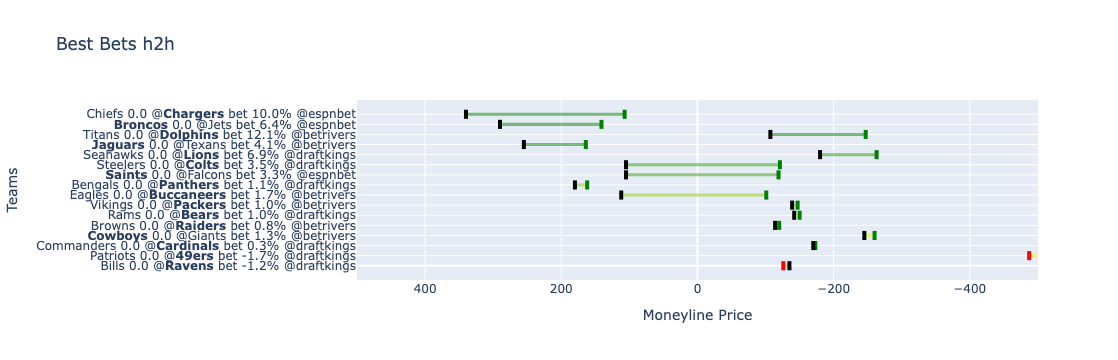

In [136]:
fig = ve.create_best_bets_graph(best_bets=h2h,
                            year=year,
                            week=week,
                            market_type="h2h")